# In this code, I will be applying neural networks for PVT correlation, and will use hyperparameters tuning using keras tuner to get the best hyperparameters

I will be using scikit, MLPRegressor for the neural network model

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd

In [ ]:
from google.colab import files
files.upload()

In [4]:
df=pd.read_csv('Chapter6_PVT Data.csv')
df.head()

,Temperature,Rs,Gas Gravity,Oil API,Pbp
0,124.224811,983.507201,1.095773,27.378218,3094.473796
1,105.670201,1118.311927,1.264539,30.497141,2593.138497
2,220.984279,255.071907,0.840619,37.779038,1118.302194
3,244.728321,48.801731,1.109872,35.049613,232.011706
4,104.153879,75.385002,0.889540,24.543380,421.236666


In [5]:
df.describe()

,Temperature,Rs,Gas Gravity,Oil API,Pbp
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,147.796271,411.145756,1.012870,31.658760,1424.602150
std,41.936641,291.829082,0.162192,5.036067,908.669973
min,70.447234,27.832416,0.797048,17.854225,131.484967
25%,116.365357,183.034832,0.885612,28.469070,697.772696
50%,142.257643,348.735793,0.978741,32.604282,1252.802615
75%,176.074354,587.055416,1.113760,35.875571,1937.635034
max,282.911419,1471.094081,1.632588,39.714096,4306.643567


In [6]:
df1=df
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df1=sc.fit_transform(df1)
df1=pd.DataFrame(df1, columns=df.columns)
x=df1.iloc[:,0:4]
y=df1.iloc[:,4]
print('xnorm', x)
print('\n\nynorm', y)

xnorm      Temperature        Rs  Gas Gravity   Oil API
0       0.253114  0.662163     0.357523  0.435684
1       0.165783  0.755566     0.559507  0.578362
2       0.708529  0.157449     0.052147  0.911479
3       0.820285  0.014529     0.374397  0.786619
4       0.158646  0.032948     0.110697  0.306002
..           ...       ...          ...       ...
244     0.158016  0.169922     0.040176  0.629538
245     0.392637  0.081187     0.069890  0.443044
246     0.303037  0.044121     0.228887  0.641406
247     0.607431  0.146021     0.199245  0.778893
248     0.252848  0.697718     0.382911  0.589227

[249 rows x 4 columns]


ynorm 0      0.709671
1      0.589595
2      0.236354
3      0.024077
4      0.069399
         ...   
244    0.240674
245    0.156046
246    0.063672
247    0.193863
248    0.636192
Name: Pbp, Length: 249, dtype: float64


In [7]:
y.max()

1.0

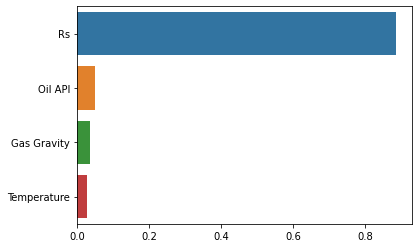

In [8]:
#check which feature has the most influence on our output
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=10, random_state=0)
rf.fit(x,y)
fi=pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
sns.barplot(x=fi, y=fi.index)

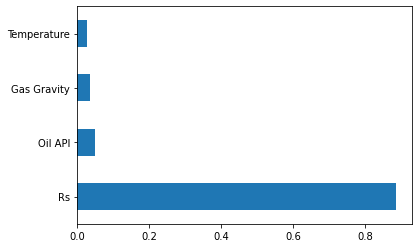

In [9]:
# or use this plot method 
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=10, random_state=0)
rf.fit(x,y)
fi=pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
fi.plot(kind='barh')


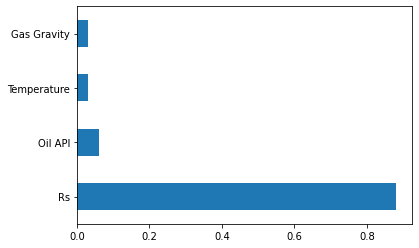

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
rf=GradientBoostingRegressor(max_depth=10, random_state=0)
rf.fit(x,y)
fi=pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
fi.plot(kind='barh')


In [11]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=50)
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor



In [12]:
#Check the model score
mlp=MLPRegressor(hidden_layer_sizes=(7), activation='tanh',
solver='lbfgs', alpha=1,
learning_rate_init=0.1, max_iter=200,
random_state=50, tol=0.01).fit(x_train,y_train)

r2_score(y_test, mlp.predict(x_test))

0.8995558148359026

In [81]:
#or use randomized grid search to fetch the best parameters
h=[4,5,6,7,8,9,10]
a=['tanh', 'relu',]
m=[200, 300,400,500,600]
al=[0.0001, 0.001,1]
t=[0.001,0.01,1]
s=['lbfj', 'adam']
r=list(range(0,1001))
l=[0.001,0.01,0.1,0.2,0.3,0.4,1,1.1]
hyper_parameters=dict(hidden_layer_sizes=h, activation=a, max_iter=m, alpha=al, tol=t, solver=s, random_state=r, learning_rate_init=l)

mlp=MLPRegressor()
rscv=RandomizedSearchCV(mlp,hyper_parameters,n_iter=20, cv=5).fit(x,y)
print('best score:', rscv.best_score_)
print('\nbest parameters:', rscv.best_params_)

best score: 0.928198745362379

best parameters: {'tol': 0.001, 'solver': 'adam', 'random_state': 780, 'max_iter': 300, 'learning_rate_init': 0.1, 'hidden_layer_sizes': 5, 'alpha': 0.0001, 'activation': 'relu'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 384, in _fit
    self._validate_hyperparameters()
  F

In [82]:
#if i need 2 hidden layers 
mylist=[1,2,3,4,5,6,7,8,9]
my_list=list(np.random.randint(1,10, 9))

h=[]

for i,j in zip(mylist, my_list):
  hidden=(i,j)
  h.append(hidden)
    

a=['tanh', 'relu',]
m=[200, 300,400,500,600]
al=[0.0001, 0.001,1]
t=[0.001,0.01,1]
s=['lbfj', 'adam']
r=list(range(0,1001))
l=[0.001,0.01,0.1,0.2,0.3,0.4,1,1.1]
hyper_parameters=dict(hidden_layer_sizes=h, activation=a, max_iter=m, alpha=al, tol=t, solver=s, random_state=r, learning_rate_init=l)

mlp=MLPRegressor()
rscv=RandomizedSearchCV(mlp,hyper_parameters,n_iter=20, cv=5).fit(x,y)





print('best score:', rscv.best_score_)
print('\nbest parameters:', rscv.best_params_)

best score: 0.8820313891445981

best parameters: {'tol': 0.001, 'solver': 'adam', 'random_state': 913, 'max_iter': 300, 'learning_rate_init': 0.1, 'hidden_layer_sizes': (3, 5), 'alpha': 0.001, 'activation': 'relu'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
65 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 384, in _fit
    self._validate_hyperparameters()
  F

In [15]:
mlp=MLPRegressor()
mlp.fit(x_train, y_train)
y_pred_test=mlp.predict(x_test)
y_pred_train=mlp.predict(x_train)


Y_test=pd.DataFrame(y_test)
Y_train=pd.DataFrame(y_train)
Y_pred_test=pd.DataFrame(y_pred_test)
Y_pred_train=pd.DataFrame(y_pred_train)

In [16]:
r2test=r2_score(y_test,y_pred_test)
r2train=r2_score(y_train,y_pred_train)

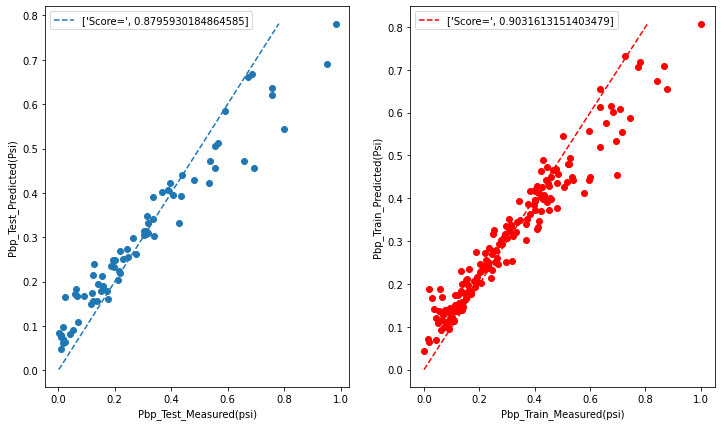

In [17]:
R2_test=['Score=',r2test]
R2_train=['Score=',r2train]
plt.figure(figsize=(12,7))

plt.subplot(1,2, 1)
plt.scatter(y_test,y_pred_test)
plt.plot([y_test.min(),y_pred_test.max()], [y_test.min(),y_pred_test.max()], '--')
plt.xlabel('Pbp_Test_Measured(psi)')
plt.ylabel('Pbp_Test_Predicted(Psi)')
plt.legend([R2_test])


plt.subplot(1,2,2)
plt.plot([y_train.min(),y_pred_train.max()], [y_train.min(),y_pred_train.max()], 'r--')
plt.scatter(y_train,y_pred_train, c='red')
plt.xlabel('Pbp_Train_Measured(psi)')
plt.ylabel('Pbp_Train_Predicted(Psi)')
plt.legend([R2_train])



In [18]:
 #using keras

In [19]:
from pandas.core.common import random_state
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import tensorflow as tf

model=Sequential()
model.add(Dense(4, activation='relu', input_dim=4))
model.add(Dense(4,activation='relu' ))
model.add(Dense(1))
np.random.seed(50)
model.compile(optimizer='adam', loss='mse')
earlystop=EarlyStopping(patience=3)
np.random.seed(50)
history=model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[earlystop])

model.evaluate(x_test,y_test)

#several loss functions exist


Epoch 1/100
6/6 [==============================] - 2s 83ms/step - loss: 0.1497 - val_loss: 0.1502
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 0.1430 - val_loss: 0.1436
Epoch 3/100
6/6 [==============================] - 0s 37ms/step - loss: 0.1377 - val_loss: 0.1382
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.1329 - val_loss: 0.1337
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 0.1286 - val_loss: 0.1296
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 0.1250 - val_loss: 0.1259
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.1213 - val_loss: 0.1225
Epoch 8/100
6/6 [==============================] - 0s 14ms/step - loss: 0.1181 - val_loss: 0.1192
Epoch 9/100
6/6 [==============================] - 0s 16ms/step - loss: 0.1149 - val_loss: 0.1161
Epoch 10/100
6/6 [==============================] - 0s 15ms/step - loss: 0.1118 - val_loss: 0.1131
Epoch 11/100
6/6 [=

0.05557772144675255

I will use Hyper parameter tuner to get best hyperparameters with Keras

In [ ]:
pip install keras-tuner

In [37]:
import keras_tuner as kt
from tensorflow import keras
from keras_tuner import Hyperband, RandomSearch

Using RandomSearch Tuner

In [46]:
def model_builder(hp):
  model=Sequential()

  for i in range(hp.Int('number_of_layers', 2,20)):

    hp_units=hp.Int('units'+str(i), min_value=7, max_value=30, step=1) #+str(i) means to give unit i ....
    model.add(Dense(units=hp_units, activation='relu', input_dim=4))
  
  model.add(Dense(1))
  
  hp_loss=hp.Choice('loss', values=['mse', 'msle'])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-1,1e-2, 1e-3, 1e-4])), loss=hp_loss)
  return model
  

In [47]:
tuner=RandomSearch(model_builder, objective='val_loss', max_trials=100, seed=50)
early_stop=EarlyStopping(patience=2, monitor='val_loss')
tuner.search(x_train, y_train, callbacks=[early_stop], epochs=100, validation_data=(x_test, y_test))

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [48]:
best_hp=tuner.get_best_hyperparameters()[0]

In [49]:
h_model = tuner.hypermodel.build(best_hp)
h_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 7)                 35        
                                                                 
 dense_20 (Dense)            (None, 7)                 56        
                                                                 
 dense_21 (Dense)            (None, 1)                 8         
                                                                 
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [50]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 26
learning_rate: 0.01
loss: msle
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0143
number_of_layers: 2
units0: 7
units1: 7
Score: 0.00012228272680658847
Trial summary
Hyperparameters:
units: 28
learning_rate: 0.01
loss: msle
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0228
Score: 0.00012458980199880898
Trial summary
Hyperparameters:
units: 29
learning_rate: 0.01
loss: msle
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0204
Score: 0.0001963531831279397
Trial summary
Hyperparameters:
units: 12
learning_rate: 0.01
loss: msle
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0144
Score: 0.00024657094036228955
Trial summary
Hyperparameters:
units: 25
learning_rate: 0.01
loss: msle
tuner/epochs: 34
tuner/initial_e

Using Hyperband tuner


In [72]:
def model_builder(hp):
  model=Sequential()
  hp_units=hp.Int('units', min_value=7, max_value=30, step=1)
  model.add(Dense(units=hp_units, activation='relu', input_dim=4))
  
  model.add(Dense(1))
  
  hp_loss=hp.Choice('loss', values=['mse', 'msle'])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-1,1e-2, 1e-3, 1e-4])), loss=hp_loss)
  return model
  #hp.Choice('learning_rate', values=[hp_lr])
  

In [73]:

tuner = kt.Hyperband(model_builder, max_epochs=100, objective='loss')

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [74]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 7, 'max_value': 30, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}
loss (Choice)
{'default': 'mse', 'conditions': [], 'values': ['mse', 'msle'], 'ordered': False}


In [75]:
early_stop=EarlyStopping(patience=2, monitor='val_loss')
tuner.search(x_train, y_train, callbacks=[early_stop], epochs=10)

Trial 254 Complete [00h 00m 06s]
loss: 0.09200189262628555

Best loss So Far: 0.00012228272680658847
Total elapsed time: 00h 01m 06s
INFO:tensorflow:Oracle triggered exit


In [76]:
best_hp=tuner.get_best_hyperparameters()[0]

In [77]:
best_hp

In [78]:
h_model = tuner.hypermodel.build(best_hp)
h_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 26)                130       
                                                                 
 dense_3 (Dense)             (None, 1)                 27        
                                                                 
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [62]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 26
learning_rate: 0.01
loss: msle
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0143
number_of_layers: 2
units0: 7
units1: 7
Score: 0.00012228272680658847
Trial summary
Hyperparameters:
units: 28
learning_rate: 0.01
loss: msle
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0228
Score: 0.00012458980199880898
Trial summary
Hyperparameters:
units: 29
learning_rate: 0.01
loss: msle
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0204
Score: 0.0001963531831279397
Trial summary
Hyperparameters:
units: 12
learning_rate: 0.01
loss: msle
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0144
Score: 0.00024657094036228955
Trial summary
Hyperparameters:
units: 25
learning_rate: 0.01
loss: msle
tuner/epochs: 34
tuner/initial_e

In [58]:
h_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 5ms/step - loss: 0.0428
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0248
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 11/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 12/100
6/6 [==============================] - 0s 4ms/step - loss: 9.8577e-04
Epoch 13/100
6/6 [==============================] - 0s 3m

In [59]:
h_model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 2.4297e-04


0.00024296817719005048

In [60]:
# to save the models and scaler function for later uses
from pickle import dump, load
dump(mlp, open('mlp.pkl', 'wb'))
dump(model, open('model.pkl', 'wb'))
dump(sc, open('sc.pkl', 'wb'))

# to load these models to use on new data sets
new_model= load(open('model.pkl', 'rb'))
new_mlp=load(open('mlp.pkl', 'rb'))
new_scaler=load(open('sc.pkl', 'rb'))

#scaled_df=new_scaler.fit_transform(new_df)
#model=new_model.predict(data we need to predict)
#model=new_mlp.predict(data we need to predict)

INFO:tensorflow:Assets written to: ram://00a56959-2dad-41d3-8512-98e1e2f6e20b/assets
